<a href="https://colab.research.google.com/github/Azufendei/Regression-Analysis/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-02-19 15:15:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   276KB/s    in 0.3s    

2024-02-19 15:15:32 (276 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Exploratory Data Analysis

In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
SF=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
SF.head(12)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Data Visualisations

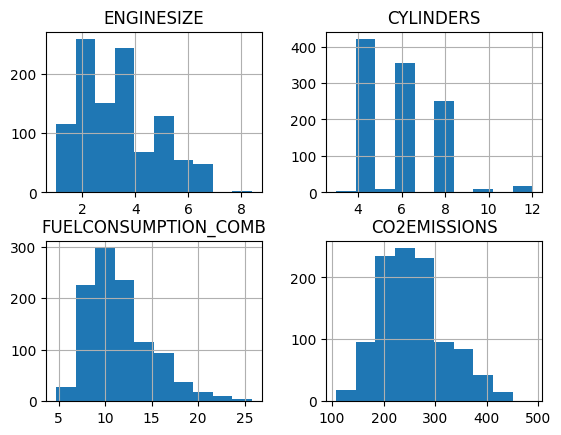

In [6]:
Vis=SF
Vis.hist()
plt.show()

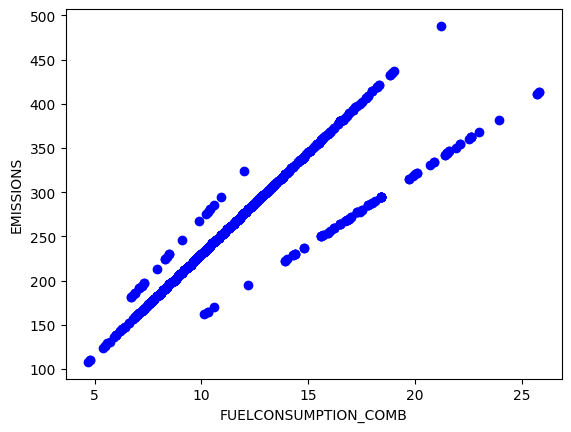

In [7]:
plt.scatter(SF.FUELCONSUMPTION_COMB,SF.CO2EMISSIONS,color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.show()

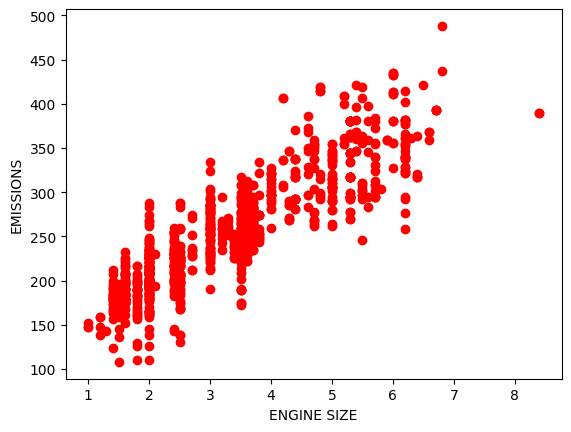

In [8]:
plt.scatter(SF.ENGINESIZE, SF.CO2EMISSIONS, color = 'red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSIONS")
plt.show()

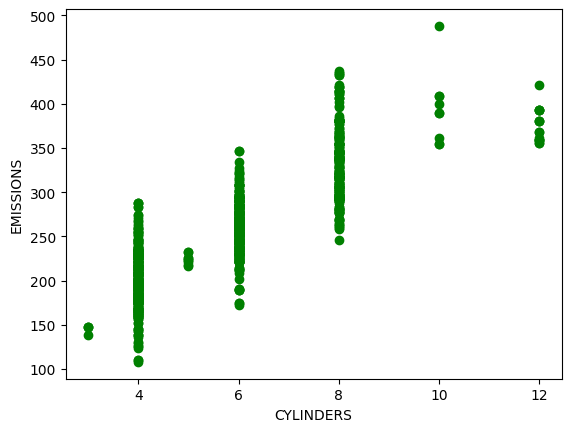

In [9]:
plt.scatter(SF.CYLINDERS, SF.CO2EMISSIONS, color = 'green')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")
plt.show()

Dataset splitting

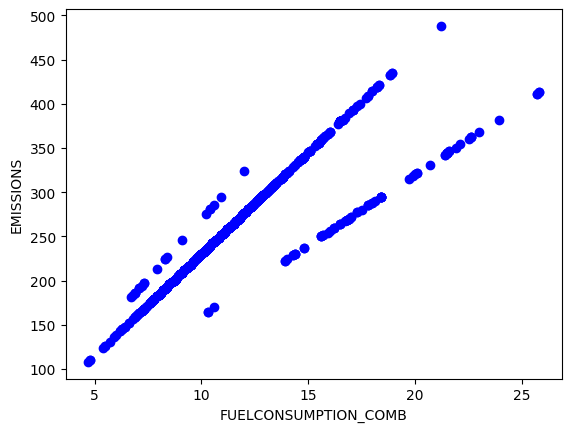

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = SF[msk]
test= SF[~msk]
plt.scatter(train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.show()

SIMPLE LINEAR REGRESSION MODEL


In [11]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
regr = linear_model.LinearRegression()
EntrainX= np.asanyarray(train[['ENGINESIZE']])
FCmbtrainX= np.asanyarray(train[['FUELCONSUMPTION_COMB']])
trainY= np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(EntrainX,trainY)
regr.fit(FCmbtrainX,trainY)
print("Regression using engine size:")
print("coefficients:",reg.coef_ )
print("intercept:",reg.intercept_)
print("Regression using FUELCONSUMPTION_COMB:")
print("coefficients:", regr.coef_)
print("intercept:", regr.intercept_)


Regression using engine size:
coefficients: [[39.32052716]]
intercept: [124.24972169]
Regression using FUELCONSUMPTION_COMB:
coefficients: [[15.77794045]]
intercept: [72.65136912]


LINEAR REGRESSION ENGINE SIZE VS EMISSION


Text(0, 0.5, 'Emission')

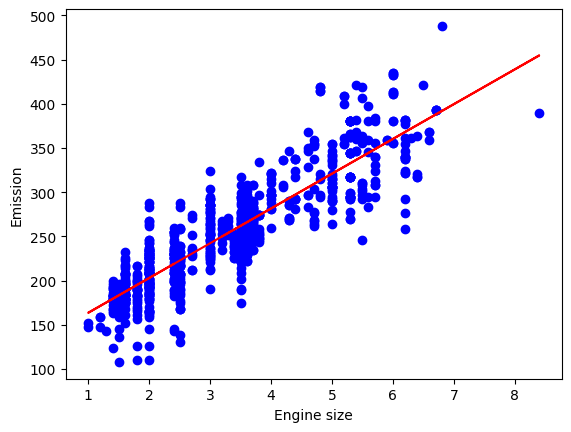

In [12]:
print("LINEAR REGRESSION ENGINE SIZE VS EMISSION")
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(EntrainX, reg.coef_[0][0]*EntrainX + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

LINEAR REGRESSION: FUELCONSUMPTION_COMB VS EMISSION


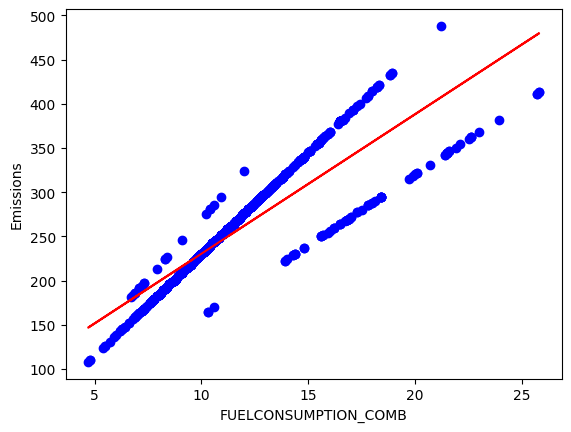

In [13]:
print("LINEAR REGRESSION: FUELCONSUMPTION_COMB VS EMISSION")
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(FCmbtrainX, regr.coef_[0][0]*FCmbtrainX + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

Simple Linear Model Evaluation

In [14]:
from sklearn.metrics import r2_score
EntestX= np.asanyarray(test[['ENGINESIZE']])
testY = np.asanyarray(test[['CO2EMISSIONS']])
EntestY= reg.predict(EntestX)
print("Mean Absolute Error Engine Size vs Emissions:",np.mean(np.absolute(EntestY-testY)))
print("Mean Squared Error Engine Size vs Emissions:",np.mean((EntestY-testY)**2))
print("R2 SCORE Engine Size vs Emissions:", r2_score(testY,EntestY))
FCmbtestX= np.asanyarray(test[['FUELCONSUMPTION_COMB']])
FCmbtestY= regr.predict(FCmbtestX)
print("Mean Absolute Error FUELCONSUMPTION_COMB vs Emissions:", np.mean(np.absolute(FCmbtestY-testY)))
print("Mean Squared Error FUELCONSUMPTION_COMB vs Emissions:", np.mean((FCmbtestY-testY)**2))
print("R2 Score FUELCONSUMPTION_COMB vs Emissions: ", r2_score(testY,FCmbtestY))

Mean Absolute Error Engine Size vs Emissions: 25.170400446239118
Mean Squared Error Engine Size vs Emissions: 1126.862620055772
R2 SCORE Engine Size vs Emissions: 0.7419061413496012
Mean Absolute Error FUELCONSUMPTION_COMB vs Emissions: 21.34740609517163
Mean Squared Error FUELCONSUMPTION_COMB vs Emissions: 778.7608914782455
R2 Score FUELCONSUMPTION_COMB vs Emissions:  0.8216345099478967


Multiple Linear Regression

In [15]:
regres=linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regres.fit(x,y)
print('coefficients:',regres.coef_ )
print('intercept:',regres.intercept_)


coefficients: [[11.77817789  7.35506782  9.05928462]]
intercept: [68.64896459]


In [16]:
y_hat= regres.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) :", np.mean((y_hat - y) ** 2))
print('Variance score:',regres.score(x, y))

Mean Squared Error (MSE) : 587.2327717776897
Variance score: 0.8655016420843105


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test= df[~msk]
mlr = linear_model.LinearRegression()
X = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
Y = np.asanyarray(train[['CO2EMISSIONS']])
mlr.fit(X,Y)
Y_hat= mlr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print("Mean Squared Error (MSE) :", np.mean((Y_hat - y) ** 2))
print('Variance score:',mlr.score(x, y))


Mean Squared Error (MSE) : 589.4217836765995
Variance score: 0.8456534527342752


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
polytrainX=np.asanyarray(train[['ENGINESIZE']])
polytrainY=np.asanyarray(train[['CO2EMISSIONS']])
polytestX=np.asanyarray(test[['ENGINESIZE']])
polytestY=np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
PolyTrainX=poly.fit_transform(polytrainX)
PolyTrainX

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

Polynomial Model

In [19]:
PLR=linear_model.LinearRegression()
poltrainY=PLR.fit(PolyTrainX,polytrainY)
print ('Coefficients: ', PLR.coef_)
print ('Intercept: ',PLR.intercept_)



Coefficients:  [[ 0.         46.46628777 -0.81346125]]
Intercept:  [112.53904382]


Text(0, 0.5, 'Emission')

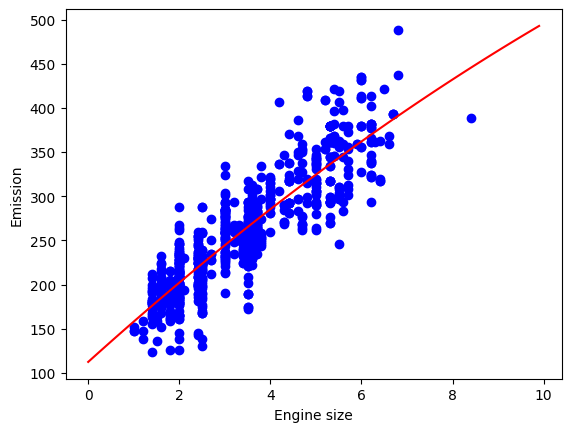

In [20]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = PLR.intercept_[0]+ PLR.coef_[0][1]*XX+ PLR.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [21]:
from sklearn.metrics import r2_score
test_x_poly = poly.transform(polytestX)
test_y_ = PLR.predict(test_x_poly)
print("Mean absolute error:", np.mean(np.absolute(test_y_ - polytestY)))
print("Residual sum of squares (MSE):", np.mean((test_y_ - polytestY) ** 2))
print("R2-score: ", r2_score(polytestY,test_y_ ) )

Mean absolute error: 25.062195781855817
Residual sum of squares (MSE): 1092.5970351718872
R2-score:  0.7138915041794991


higher degree plr

Coefficients:  [[ 0.         25.748811    4.99663733 -0.49172255]]
Intercept:  [134.27220128]
Mean absolute error: 24.906203664638742
Residual sum of squares (MSE): 1082.2365270078806
R2-score: 0.7166045166729602


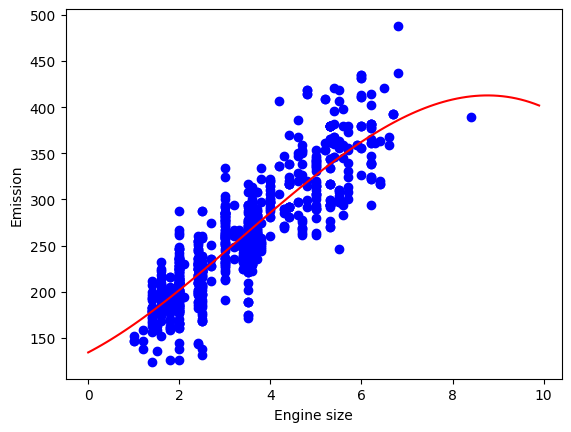

In [22]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(polytrainX)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, polytrainY)

print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(polytestX)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error:", np.mean(np.absolute(test_y3_ - polytestY)))
print("Residual sum of squares (MSE):", np.mean((test_y3_ - polytestY) ** 2))
print("R2-score:", r2_score(polytestY,test_y3_ ) )

Non Linear Regression: some typical graphs


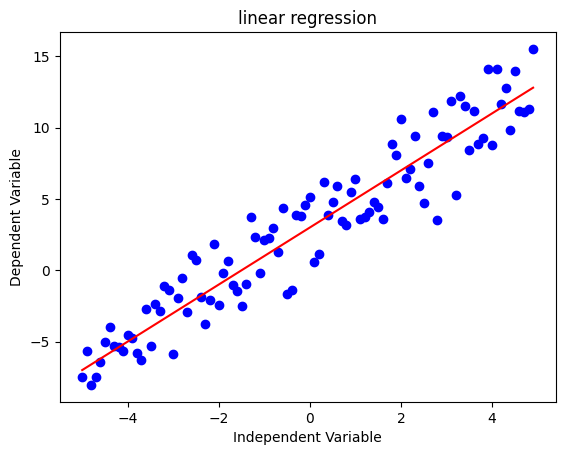

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.title("Linear Regression")
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

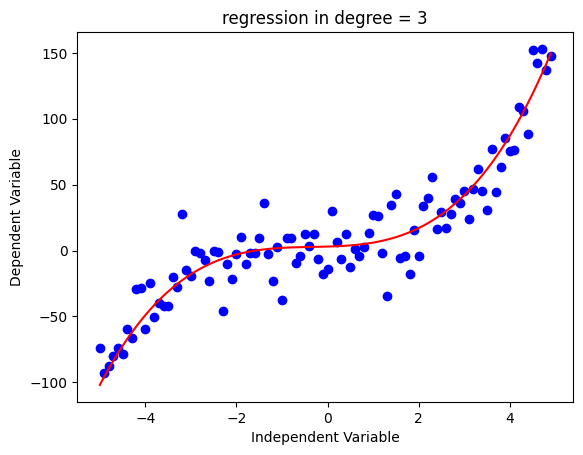

In [32]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.title("regression in degree = 3")
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

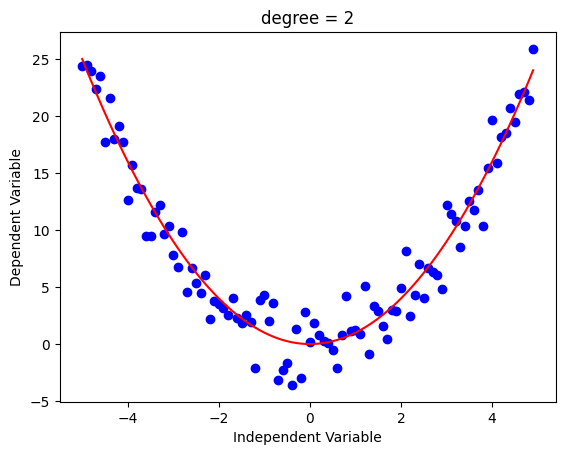

In [33]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.title("degree = 2")
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

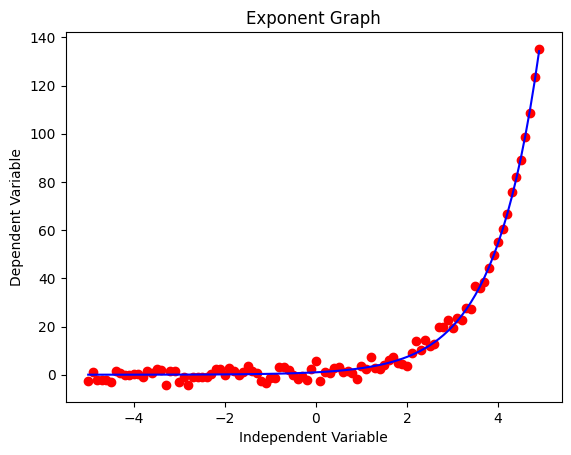

In [52]:
X = np.arange(-5.0, 5.0, 0.1)
##You can adjust the slope and intercept to verify the changes in the graph
Y= np.exp(X)
y_noise = 2 * np.random.normal(size=X.size)
ydata = Y + y_noise
plt.plot(x, ydata,  'ro')
plt.plot(x,Y, 'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title("Exponent Graph")
plt.show()

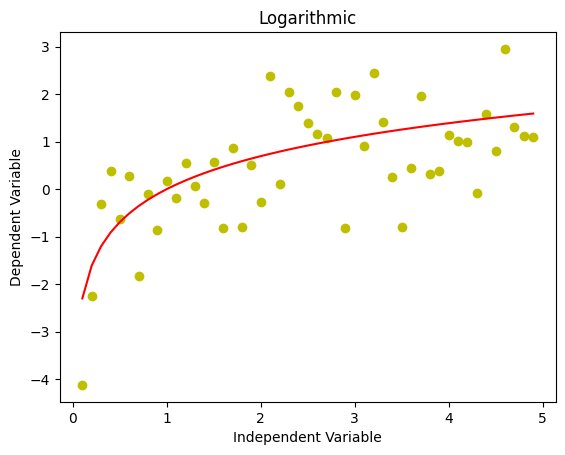

In [51]:
X = np.arange(0.1, 5.0, 0.1)
Y = np.log(X)
y_noise = np.random.normal(size=X.size)
y_data = Y + y_noise
plt.title("Logarithmic Graph")
plt.plot(X, y_data,  'yo')
plt.plot(X,Y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

𝑌̂ =1/(1+𝑒^(−𝛽1(𝑋−𝛽2)))

𝛽1
 : Controls the curve's steepness,

𝛽2
 : Slides the curve on the x-axis.

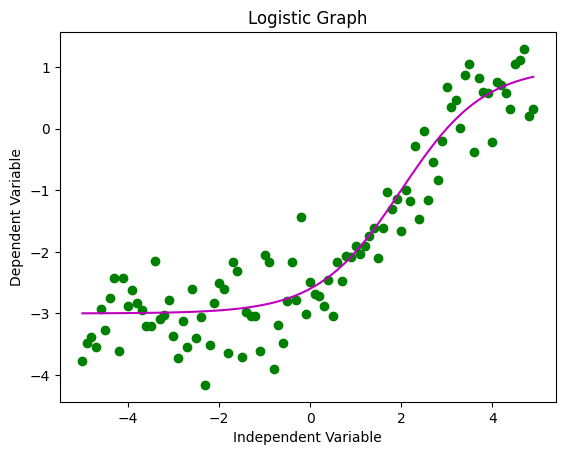

In [67]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
y_noise = np.random.normal(size = X.size)*0.5
Y_Data = Y+y_noise
plt.plot(X, Y_Data,  'go')
plt.title("Logistic Graph")
plt.plot(X,Y, 'm')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

EXAMPLE DATASET

In [58]:

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

2024-02-19 16:36:17 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


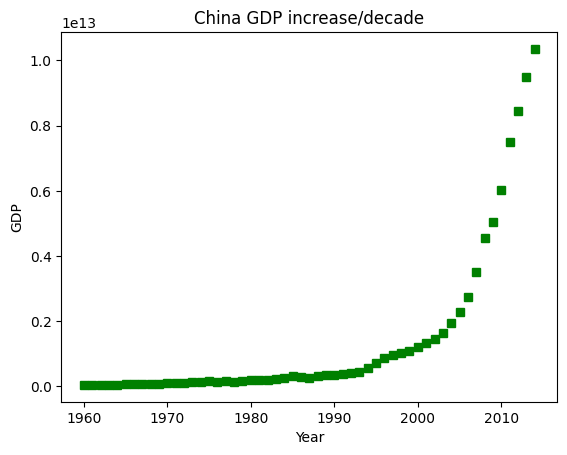

In [64]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.title("China GDP increase/decade")
plt.plot(x_data, y_data, 'gs')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

For the given data points the logistic graph looks like a good fit

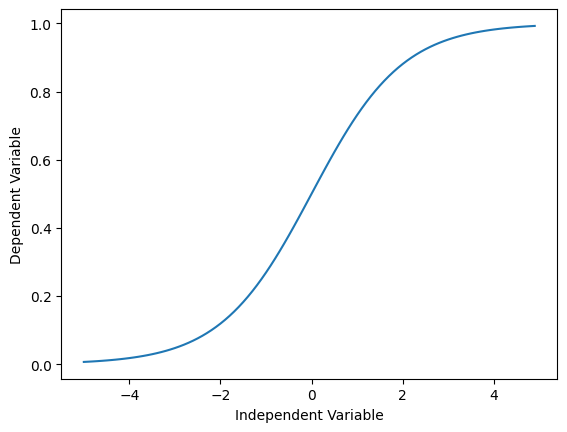

In [65]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

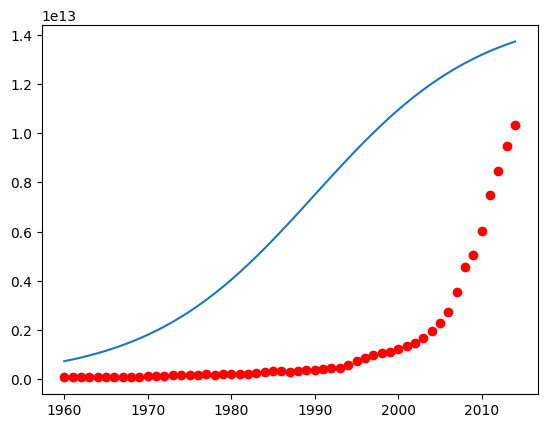

In [68]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Fitting the curve using curve fit

In [69]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


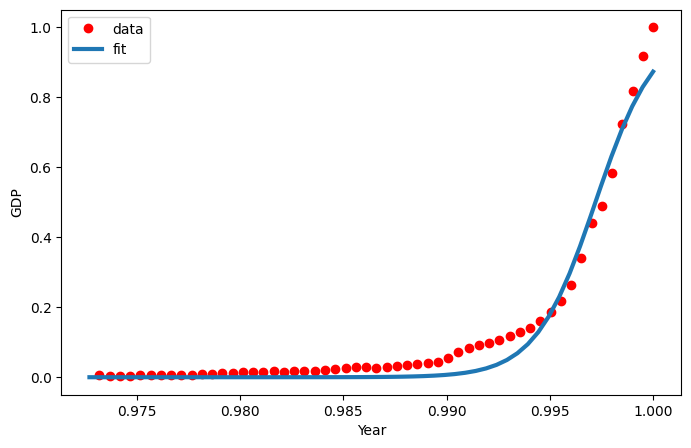

In [80]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [82]:

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)
y_hat = sigmoid(test_x, *popt)
print("Mean absolute error:", np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE):", np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.024868177653860346
Residual sum of squares (MSE): 0.001151478926041702
R2-score: 0.16
